<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase6_espacial_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


In [0]:
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

def displayColor2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# **Filtro promedio**

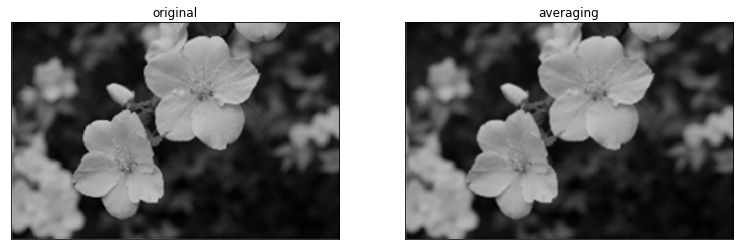

In [0]:


img = cv2.imread('flor.png')

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)

displayColor2(img,dst,"original","averaging")


# **Filtrado y umbralización**


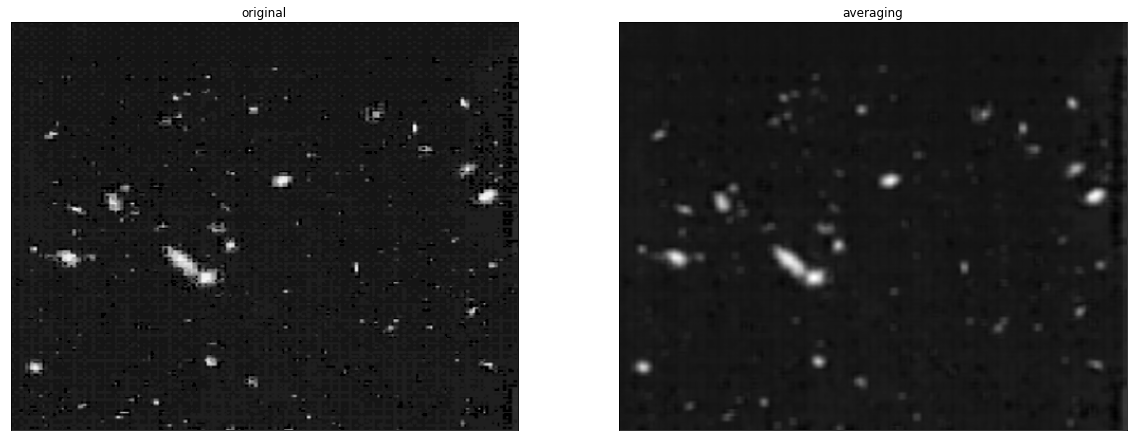

In [0]:
img = cv2.imread('manchas.png',0)

kernel = np.ones((7,7),np.float32)/49
blur = cv2.filter2D(img,-1,kernel)
rows, columns = img.shape

displayGray2(img,blur,"original","averaging")

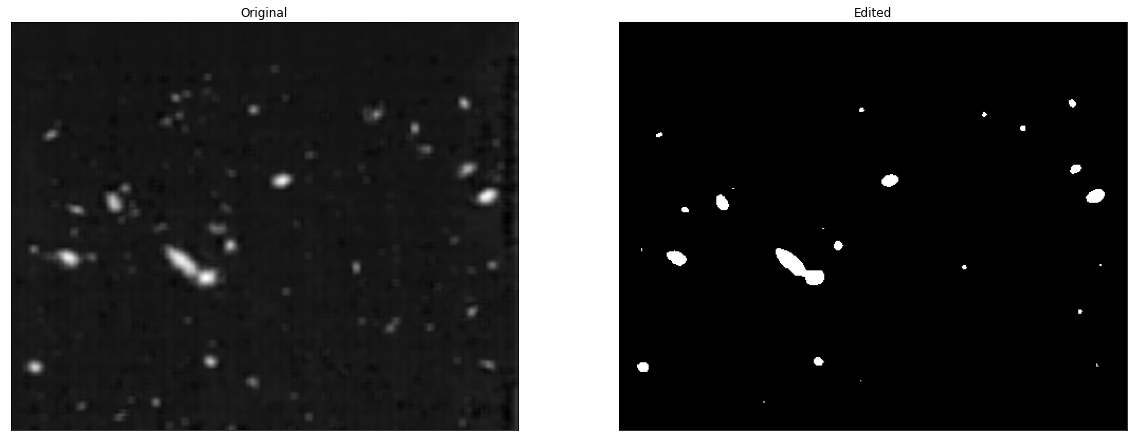

In [0]:
img2 = np.zeros( (rows, columns), dtype = np.uint8)

#intervalos
T = 100

for x in range(0,rows):
    for y in range(0,columns):
        r = blur[x][y]
        if T>=r:
            img2[x][y] = 0
        else:
            img2[x][y] = 255
displayGray2(blur,img2)

# **Median Filter**

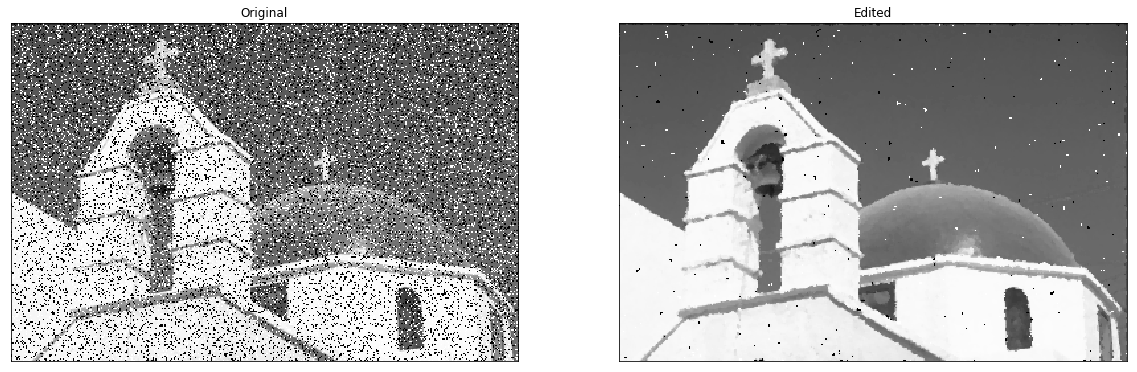

In [0]:
# read the image
img = cv2.imread("saltlgle.png",0)
# apply the 3x3 median filter on the image
median = cv2.medianBlur(img, 3)

# display image

displayGray2(img,median)


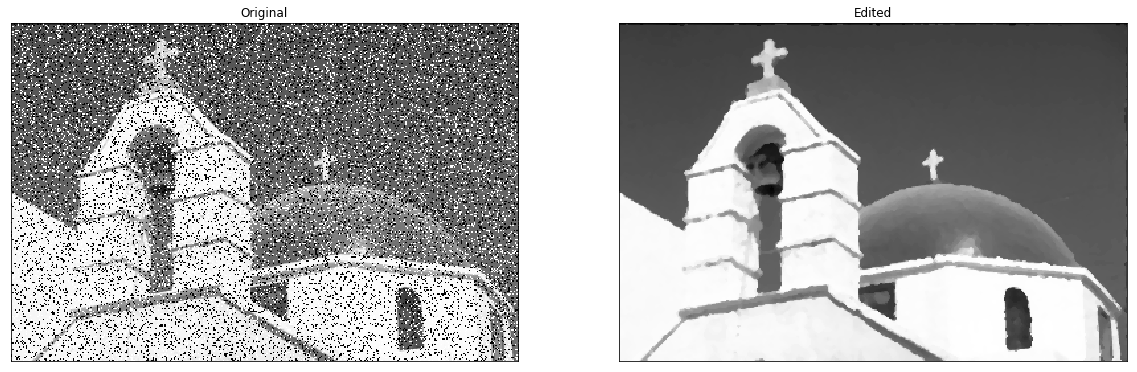

In [0]:
# read the image
img = cv2.imread("saltlgle.png",0)
# apply the 3x3 median filter on the image
median = cv2.medianBlur(img, 3)
median = cv2.medianBlur(median, 3)
median = cv2.medianBlur(median, 3)

# display image

displayGray2(img,median)

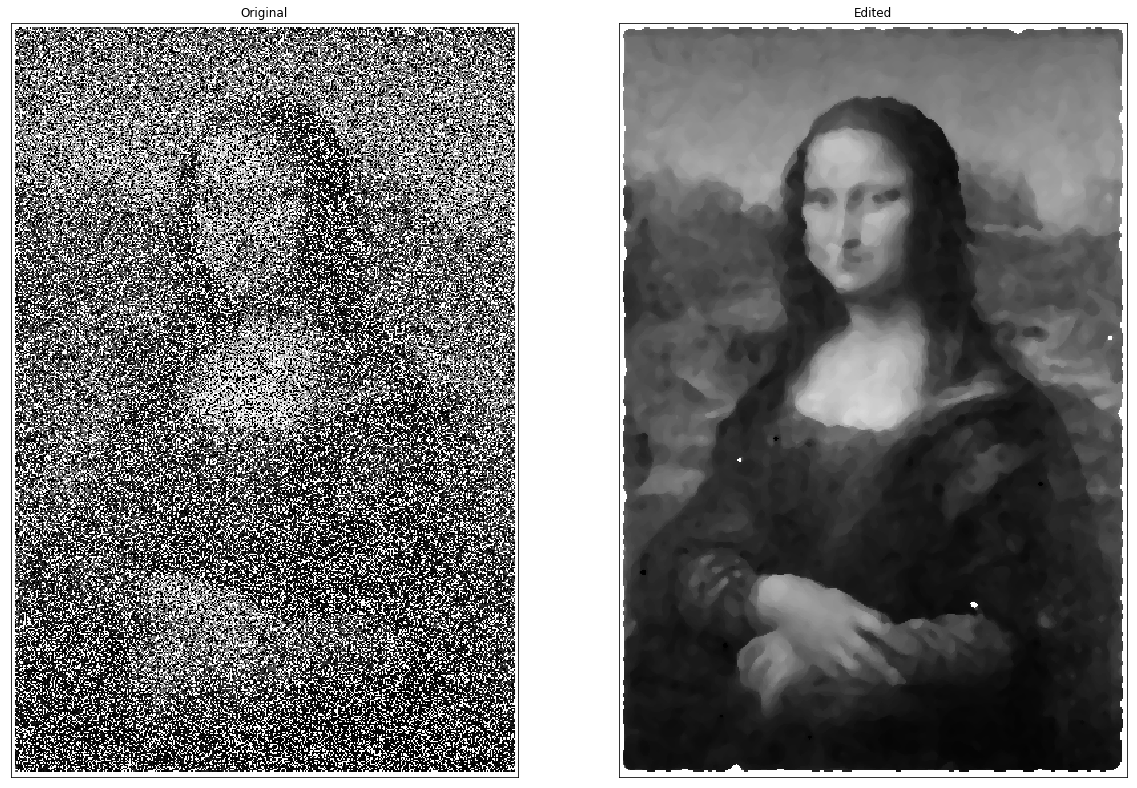

In [0]:
# read the image
img = cv2.imread("saltpepper.png",0)
# apply the 3x3 median filter on the image
median = cv2.medianBlur(img, 3)
median = cv2.medianBlur(median, 3)
median = cv2.medianBlur(median, 3)
median = cv2.medianBlur(median, 5)
median = cv2.medianBlur(median, 5)
median = cv2.medianBlur(median, 5)
bilateral = cv2.bilateralFilter(median,9,5,5)



# display image

displayGray2(img,median)

# **GaussianBlur**

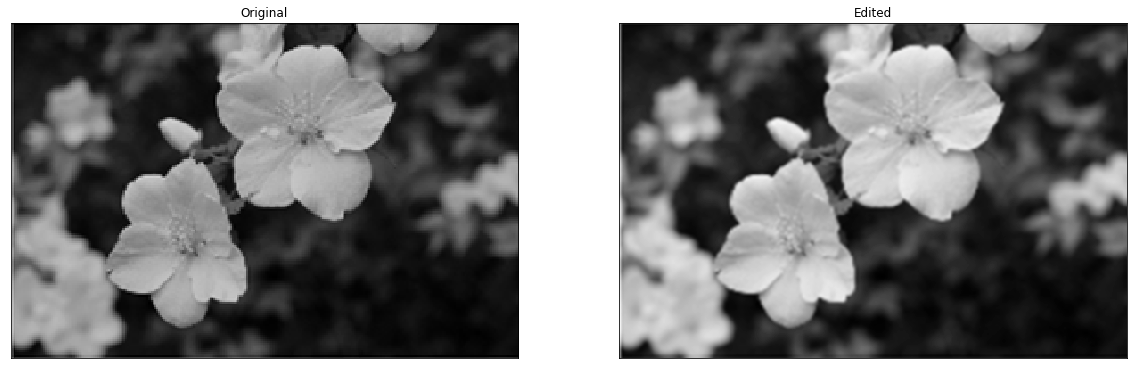

In [0]:
# read the image
img = cv2.imread("flor.png",0)
# apply the 3x3 median filter on the image
gauss = cv2.GaussianBlur(img,(5,5),0)

# display image
displayGray2(img,gauss)

# **Bilateral Filter**

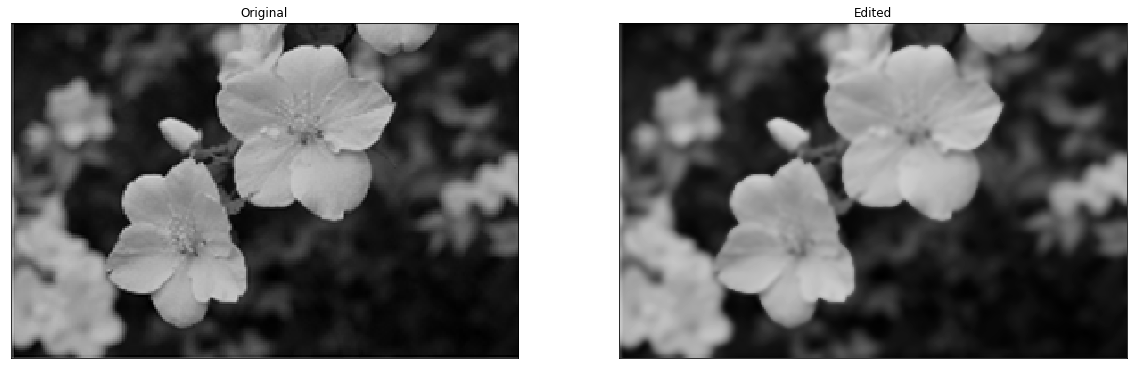

In [0]:
# read the image
img = cv2.imread("flor.png",0)
# apply the 3x3 median filter on the image
bilateral = cv2.bilateralFilter(img,9,75,75)

# display image
displayGray2(img,bilateral)

# **sharpened filter**





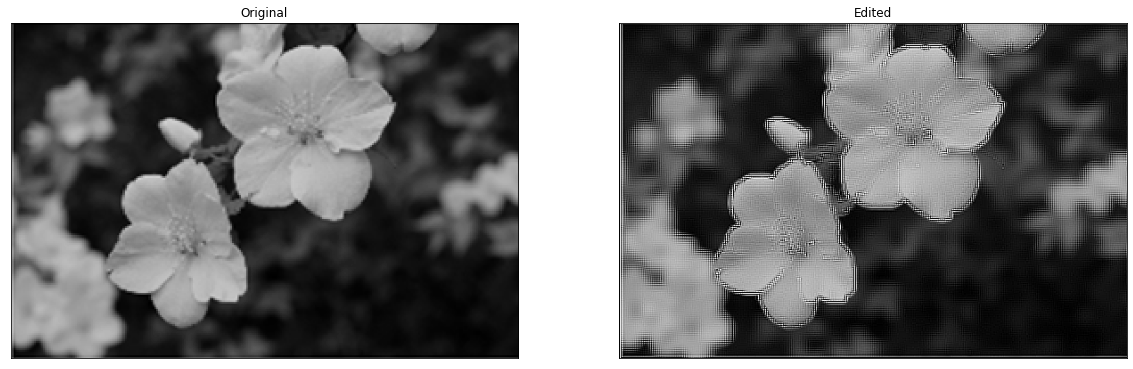

In [18]:
# Reading in and displaying our image
img = cv2.imread("flor.png",0)

# Create our shapening kernel, it must equal to one eventually

kernel_sharpening_exce = np.array([[1,1,1], 
                              [1, -7,1],
                              [1,1,1]])

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(img, -1, kernel_sharpening_exce)
displayGray2(img,sharpened)

# **laplacian**

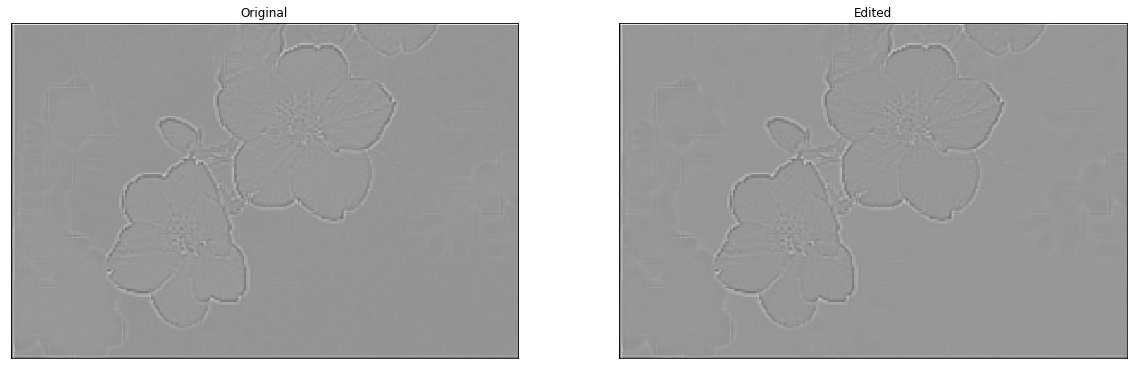

In [0]:
# read the image
img = cv2.imread("flor.png",0)
# apply the 3x3 median filter on the image

# laplacian 
lapl = cv2.Laplacian(img,cv2.CV_64F, ksize=5)

# display image
displayGray2(img,lapl)

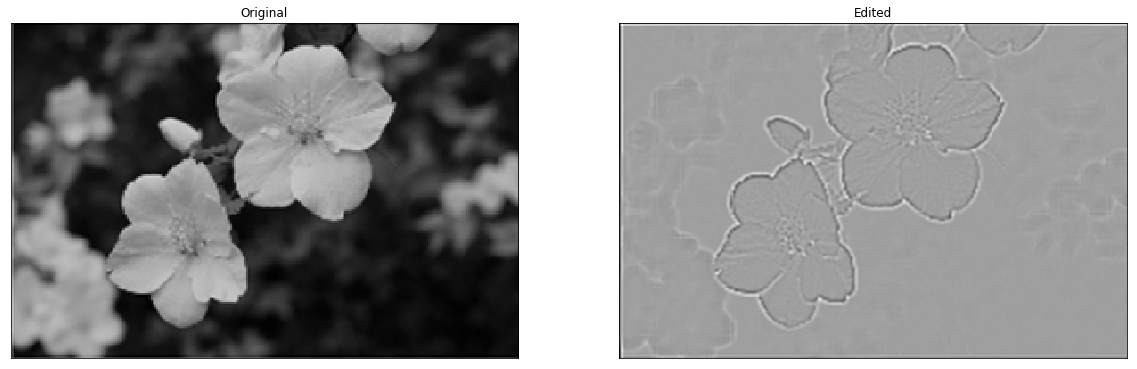

In [0]:
# read the image
img = cv2.imread("flor.png",0)
# apply the 3x3 median filter on the image
blur = cv2.GaussianBlur(img,(5,5),0)
# laplacian of gaussian
log = cv2.Laplacian(blur,cv2.CV_64F, ksize=5)

# display image
displayGray2(img,log)

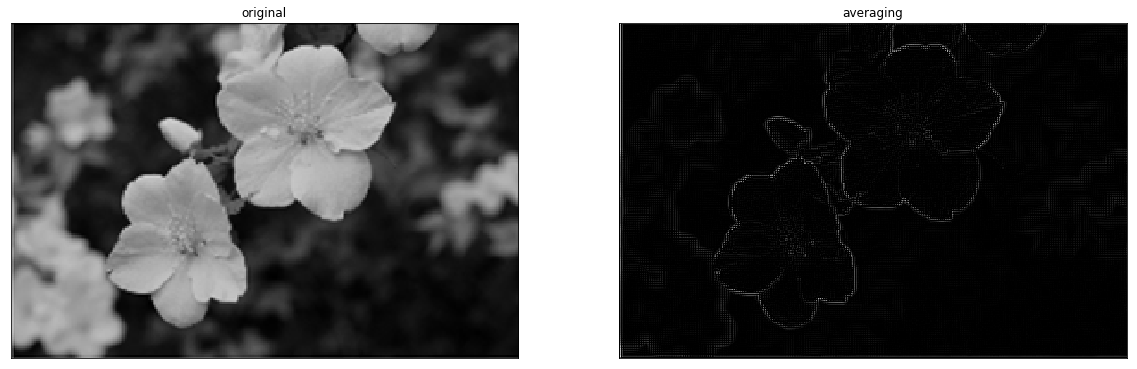

In [0]:
img = cv2.imread('flor.png',0)

kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
dst = cv2.filter2D(img,-1,kernel)

displayGray2(img,dst,"original","averaging")

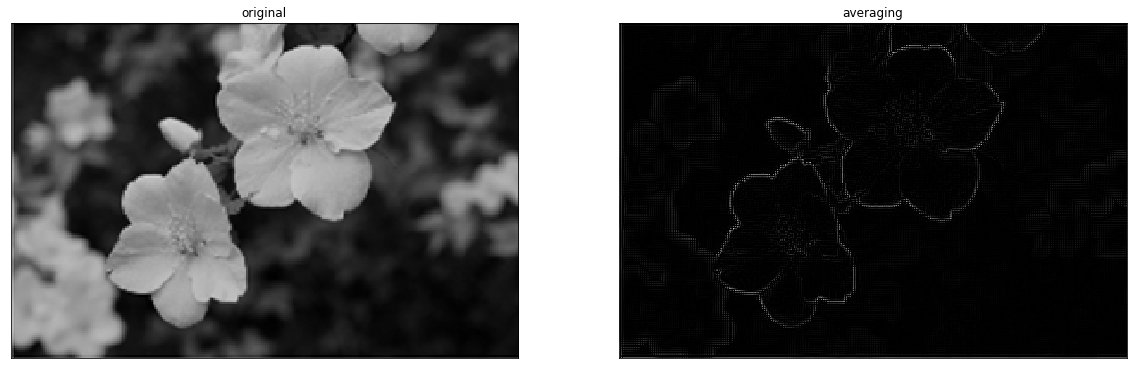

In [0]:
img = cv2.imread('flor.png')

kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)
dst = cv2.filter2D(img,-1,kernel)

displayGray2(img,dst,"original","averaging")

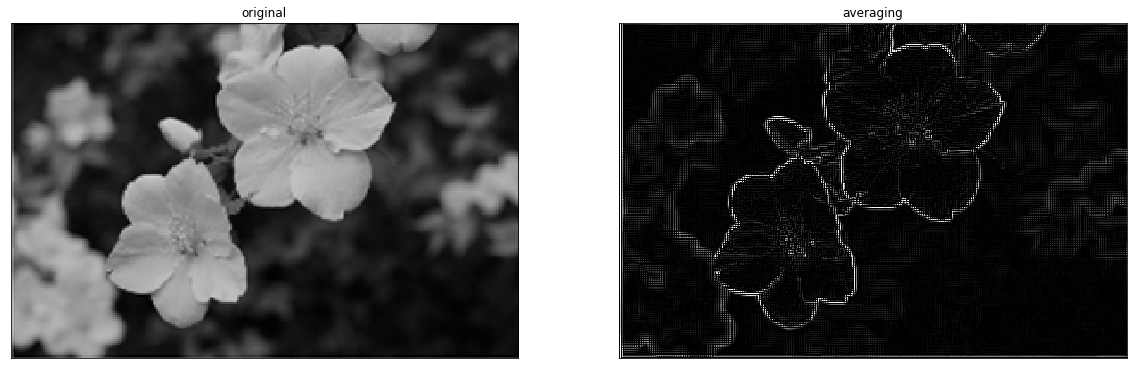

In [0]:
img = cv2.imread('flor.png')

kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]],np.float32)
dst = cv2.filter2D(img,-1,kernel)

displayGray2(img,dst,"original","averaging")

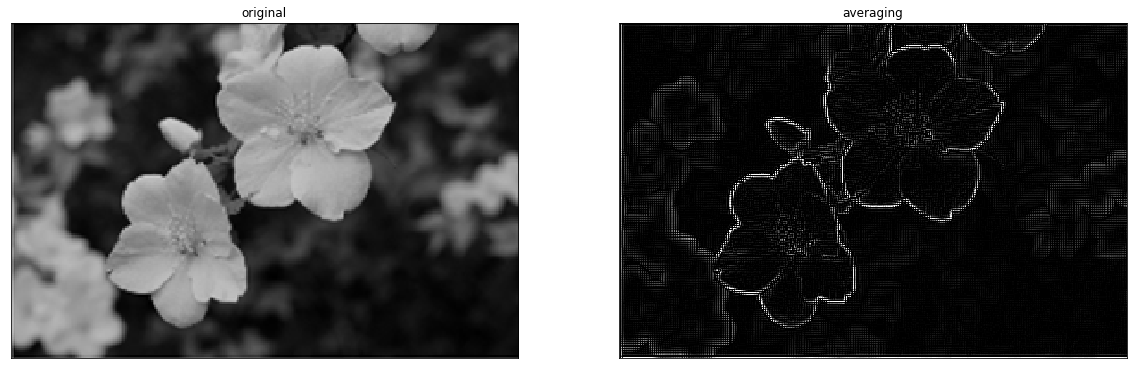

In [0]:
img = cv2.imread('flor.png')

kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],np.float32)
dst = cv2.filter2D(img,-1,kernel)

displayGray2(img,dst,"original","averaging")

# Derivative **filters**

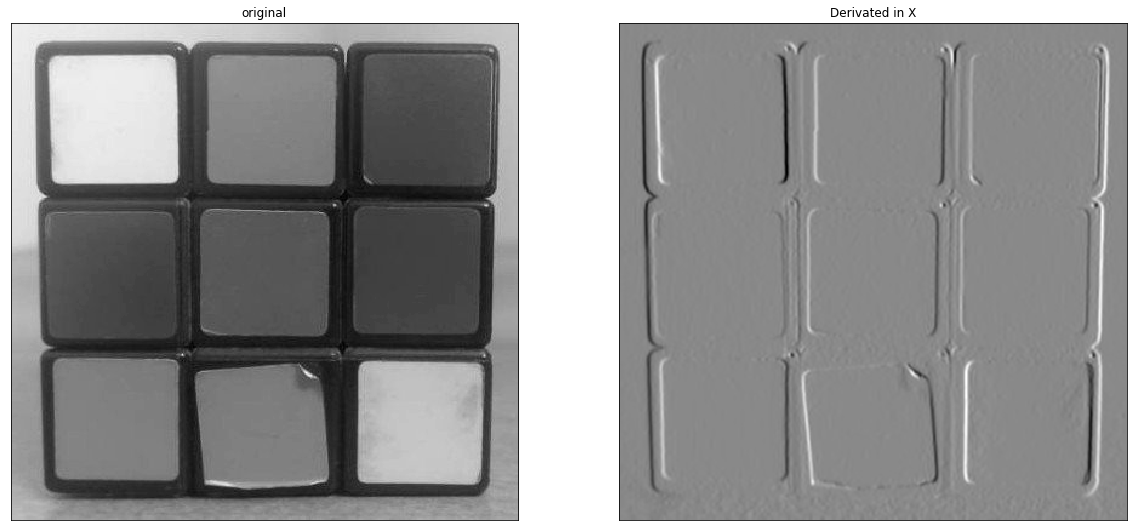

In [0]:
img = cv2.imread('ruby.jpg',0)

x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

displayGray2(img,x_sobel,"original","Derivated in X")

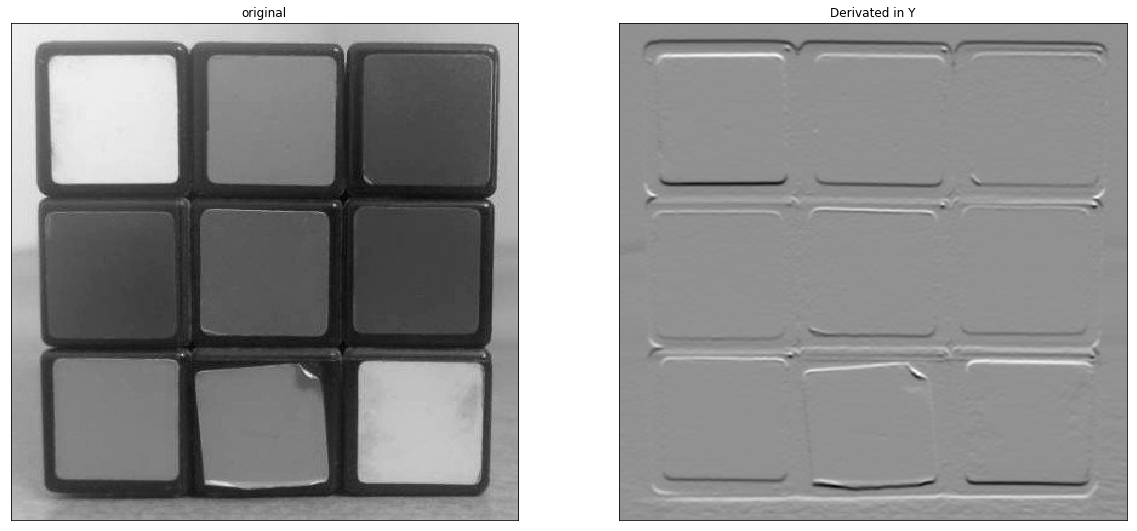

In [0]:
img = cv2.imread('ruby.jpg',0)

y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

displayGray2(img,y_sobel,"original","Derivated in Y")




